# Python Project - (Prosper Loans)
## by Nnanna Osuagwu 

## Introduction
> Introduce the dataset

The data set used for this Dataset Exploration is the data from Prosper Loans. It is a csv file conatining 113937 Rows and 82 columns of customer data





## Preliminary Wrangling

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [6]:
df = pd.read_csv('Prosper Loan.csv')

### What is the structure of your dataset?

> The Prosper Loan dataset is a data frame containing Banking Loan data of Prosper Bank

### What is/are the main feature(s) of interest in your dataset?

> Quality of Customers, Number of Customers, Quality of transactions, Total Revenue, Profit/Loss, Credit Grade etc

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Loan Original Amount, Listing Creation date, Loan Status, Occupation, Employment Status, Borrower State, Current Delinquencies etc 

## Univariate Exploration

### Questions
1. What percentage of our loans are accessed by Home Owners?
2. What is the distribution of our customers by Income Range?
> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



In [15]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationDate
0,1021339766868145413AB3B,193129,2023-08-14 09:29:18,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2023-08-14 09:29:18
1,10273602499503308B223C1,1209647,NaT,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,NaT
2,0EE9337825851032864889A,81716,2023-08-14 00:47:06,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,2023-08-14 00:47:06
3,0EF5356002482715299901A,658116,2023-08-14 02:35:00,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2023-08-14 02:35:00
4,0F023589499656230C5E3E2,909464,NaT,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,NaT,NaN,36,Current,NaT,0.22354,0.1864,0.1764,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,NaT
113933,E6DB353036033497292EE43,537216,NaT,NaN,36,FinalPaymentInProgress,NaT,0.13220,0.1110,0.1010,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22,NaT
113934,E6E13596170052029692BB1,1069178,NaT,NaN,60,Current,NaT,0.23984,0.2150,0.2050,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119,NaT
113935,E6EB3531504622671970D9E,539056,2023-08-14 18:26:36,NaN,60,Completed,2013-08-13,0.28408,0.2605,0.2505,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274,2023-08-14 18:26:36


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  45425 non-null   datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55080 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [13]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'], errors='coerce')


In [14]:
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'], errors='coerce')

In [22]:
df.loc[1,'ListingCreationDate'] = 'NaT'

In [10]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

### Visualization

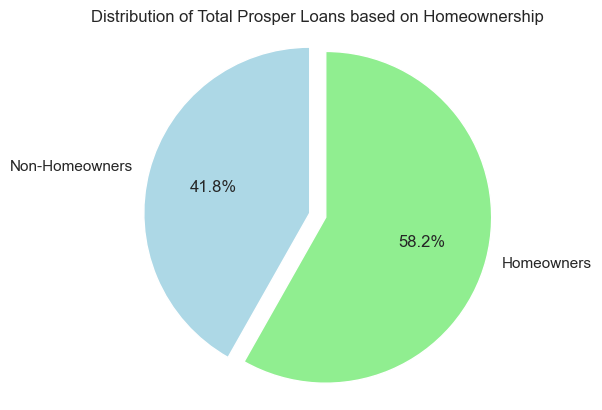

In [225]:
# Group and aggregate data by 'IsBorrowerHomeowner' and calculate the sum of 'TotalProsperLoans'
grouped = df.groupby('IsBorrowerHomeowner')['LoanOriginalAmount'].sum()

# Create a pie chart
fig, ax = plt.subplots()
colors = ['lightblue', 'lightgreen']
labels = ['Non-Homeowners', 'Homeowners']
explode = (0.1, 0)  # Highlight the first slice (Non-Homeowners)
ax.pie(grouped, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title
plt.title('Distribution of Total Prosper Loans based on Homeownership')

# Show the pie chart
plt.show()

Text(0.5, 1.0, 'Distribution of Customers by Income Range')

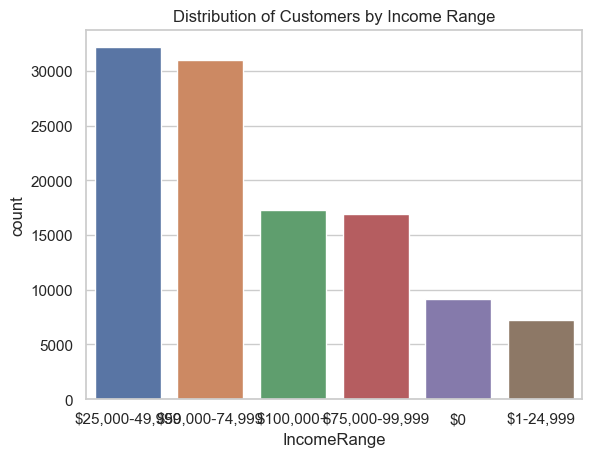

In [227]:
# Create a bar chart for Credit grade by number of customers
sns.countplot(df, x = 'IncomeRange', order = df['IncomeRange'].value_counts().index);
# Add a title
plt.title('Distribution of Customers by Income Range')
# order by ascending 

In [66]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$0                 9168
$1-24,999          7274
Name: IncomeRange, dtype: int64

In [53]:
df[df['IncomeRange'] == 'Not employed']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationDate
66,0F1D338731363098438C9F5,122819,2023-08-14 00:57:42,D,36,Completed,2010-04-17,0.16802,0.1500,0.1200,...,-33.29,0.00,0.00,0.0,1.0,0,0,0.0,1,2023-08-14 00:57:42
100,0F67356860455769574096F,704916,NaT,NaN,36,Chargedoff,2013-08-30,0.35356,0.3134,0.3034,...,0.00,3855.23,3855.23,0.0,1.0,0,0,0.0,73,NaT
125,10EC3516168266498E5E38A,506130,NaT,NaN,36,Current,NaT,0.35643,0.3199,0.3099,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,92,NaT
170,34D1354489785280859E146,578652,NaT,NaN,36,Completed,2012-07-26,0.28851,0.2499,0.2399,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,161,NaT
186,2D59353745185472301C839,556219,2023-08-14 13:30:30,NaN,36,Chargedoff,2013-09-15,0.35797,0.3177,0.3077,...,0.00,2865.35,2865.35,0.0,1.0,0,0,0.0,45,2023-08-14 13:30:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113622,C25C3536501353932589E51,551280,2023-08-14 19:31:42,NaN,36,Chargedoff,2012-02-09,0.34577,0.3058,0.2958,...,0.00,3857.00,3857.00,0.0,1.0,0,0,0.0,45,2023-08-14 19:31:42
113682,FDA5353588009083364115D,550857,NaT,NaN,60,Chargedoff,2013-02-16,0.32680,0.2997,0.2897,...,0.00,9378.83,9378.83,0.0,1.0,0,0,0.0,1,NaT
113692,E21834080607214869D918D,250328,NaT,E,36,Chargedoff,2009-01-22,0.36623,0.3500,0.3400,...,0.00,1873.62,1873.62,0.0,1.0,0,0,0.0,25,NaT
113761,E40A354460558377113BCF1,580125,NaT,NaN,60,Current,NaT,0.16151,0.1385,0.1285,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,9,NaT


In [68]:
def format_zero(value):
    return '$0' if value == 0 else value

# Apply the formatting function to the column
df['IncomeRange'] = df['IncomeRange'].apply(format_zero)

### Observations

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Both Plots are univariate plots showing the Distribution of Total Prosper Loans based on Homeownership and the Distribution of Customers by Income Range, for the first plot no transformations were needed as all rows had non null values and the possesed the same data type. for the second plot, i had to perform some transformations as some of the data in this column ahd Null values, these values were corrected and assigned the correct data type. the variables of interest are the Homeownership and IncomeRange variables

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were unusual distributions in the Distribution of Customers by Income Range as there were some data that were Not displayed and some that were unemployed. these were tidied up using value_counts() to determine the quality of the column and carrying out replacements with .replace, then the format of the data type in the column was done by using format_zero(value)

## Bivariate Exploration

### Questions
1. Checking the Income Range of our customers, what is the distribution of our loans to these customers putting into consideration their Home Ownership status?
2. What is the status of our loans in different Employment categories?


### Visualization

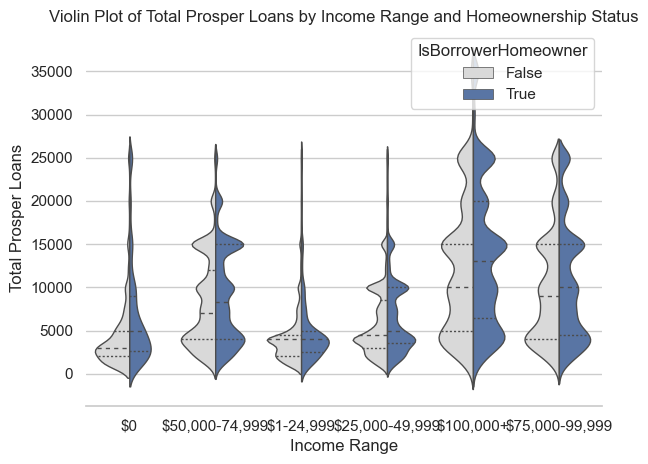

In [230]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="IncomeRange", y="LoanOriginalAmount", hue="IsBorrowerHomeowner",
               split=True, inner="quart", linewidth=1,
               palette={True: "b", False: ".85"})  # Use True and False instead of "Yes" and "No"
sns.despine(left=True)

# Add labels and title
plt.xlabel('Income Range')
plt.ylabel('Original Prosper Loan Amount')
plt.title('Violin Plot of Total Prosper Loans by Income Range and Homeownership Status')

# Show the plot
plt.tight_layout()
plt.show()

In [136]:
unique_values = df['IsBorrowerHomeowner'].unique()
print(unique_values)

[False  True]


In [123]:
df.LoanOriginationQuarter.value_counts()

Q4 2013    14450
Q1 2014    12172
Q3 2013     9180
Q2 2013     7099
Q3 2012     5632
Q2 2012     5061
Q1 2012     4435
Q4 2012     4425
Q2 2008     4344
Q4 2011     3913
Q1 2013     3616
Q3 2008     3602
Q2 2007     3118
Q3 2011     3093
Q1 2007     3079
Q1 2008     3074
Q3 2007     2671
Q4 2007     2592
Q2 2011     2478
Q4 2006     2403
Q3 2006     1934
Q1 2011     1744
Q4 2010     1600
Q2 2010     1539
Q4 2009     1449
Q3 2010     1270
Q2 2006     1254
Q1 2010     1243
Q3 2009      585
Q4 2008      532
Q1 2006      315
Q4 2005       22
Q2 2009       13
Name: LoanOriginationQuarter, dtype: int64

In [141]:
df.LoanStatus 

103509    Completed
25330     Completed
81848     Completed
43587     Completed
39870     Completed
            ...    
69372       Current
6834        Current
69369       Current
69367       Current
113936      Current
Name: LoanStatus, Length: 113937, dtype: object

In [142]:
unique_values = df['LoanStatus'].unique()
print(unique_values)

['Completed' 'Defaulted' 'Chargedoff' 'Cancelled' 'Current'
 'Past Due (1-15 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (16-30 days)' 'Past Due (31-60 days)' 'Past Due (61-90 days)'
 'Past Due (>120 days)']


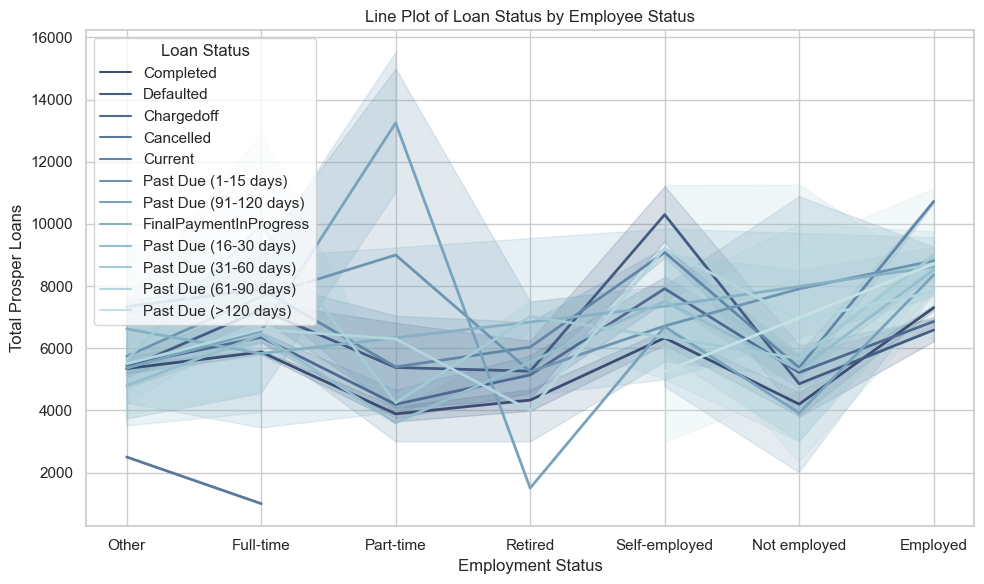

In [231]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a line plot
ax = sns.lineplot(x="EmploymentStatus", y="LoanOriginalAmount",
                  hue="LoanStatus",
                  palette="ch:r=-.2,d=.3_r",
                  linewidth=2,
                  data=df)

# Add labels and title
plt.xlabel('Employment Status')
plt.ylabel('Total Prosper Loans')
plt.title('Line Plot of Loan Status by Employee Status')

# Show the legend
plt.legend(title='Loan Status')

# Adjust layout for better visualization
plt.tight_layout()

In [182]:
unique_values = df['EmploymentStatus'].unique()
print(unique_values)

[nan 'Other' 'Full-time' 'Part-time' 'Retired' 'Self-employed'
 'Not employed' 'Employed']


In [183]:
df[df['EmploymentStatus'] == 'nan']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationDate,OriginationDate


In [181]:
df['EmploymentStatus'] = df['EmploymentStatus'].replace(['nan'], 'Other')

<Axes: xlabel='EmploymentStatus', ylabel='Count'>

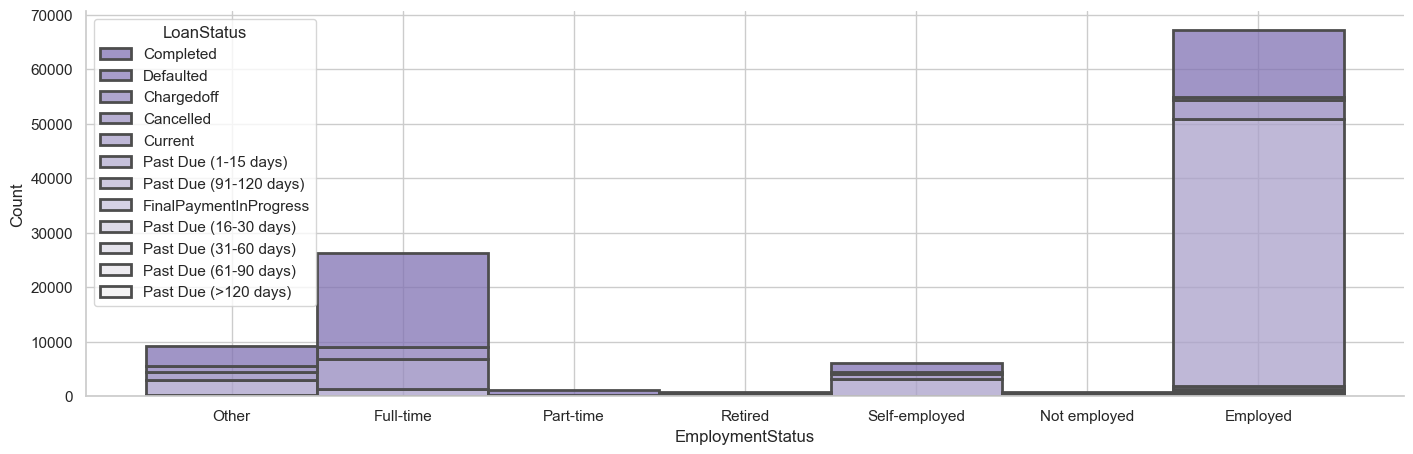

In [234]:
f, ax = plt.subplots(figsize=(17, 5))
sns.despine(f)

sns.histplot(
    df,
    x="EmploymentStatus", hue="LoanStatus",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=2,
    log_scale=False,
)



In [188]:
unique_values = df['TotalProsperLoans'].unique()
print(unique_values)

[nan  1.  2.  4.  3.  5.  6.  0.  7.  8.]


### Observation

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For the Bivirate visuals, the Violin Plot shows that the amount of home owners increases with the income range, while the lower the income range, the higher the number of Non Home Owners. the highest loan amounts were also taken by customers that earn $100,000 and above

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From the Histogram, I observed that the highest amount of loans were taken by people who are Employed, with the least amount taken by the Retired.

## Conclusions
The main findings in the Prosper Loan Data shows that there is a strong relationship between the Home Ownership status of a customer, their Employment Status, and their Income Range with the amount of loans taken and the status of such loans.
During the Data Exploration process, The data file 'Prosper Loans' was imported using read_csv() as Data frame df, Pandas and Numpy libraries were imported, columns containing data that was utilized in the visualizations were properly checked, ensuring that they contained data of the same data type, it was also ensured that these columns contained no null values.
for the visuals, both MatPlotLib and Seaborn libraries were used.